In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn


In [75]:
import sys
in_colab = 'google.colab' in sys.modules


if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'

El sistema no puede encontrar el archivo especificado.


In [2]:
seaborn.__version__


'0.9.0'

In [4]:
data= pandas.read_json(r"E:\Documents\GitHub\análisis y curación de datos\Prácicos con Euge y Leo\curacion practicos 1/pasos.json",encoding='utf-8')
data.head(10)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
5,"[-51.5866042, -72.3649779]",PASO DOROTEA,Santa Cruz
6,"[-51.2544488, -72.2652242]",PASO RIO DON GUILLERMO,Santa Cruz
7,"[-53.3229179, -68.6063227]",PASO SAN SEBASTIAN,Tierra del Fuego
8,"[-53.78438, -67.7173342]",TERMINAL RIO GRANDE,Tierra del Fuego
9,"[-53.7860374, -67.7002243]",PUERTO RIO GRANDE,Tierra del Fuego


In [4]:
data.shape


(252, 3)

In [5]:
data.describe

<bound method NDFrame.describe of                                location                             name  \
0             [-54.832543, -68.3712885]       SAN SEBASTIAN  ( USHUAIA )   
1            [-54.8249379, -68.3258626]          AERO PUBLICO DE USHUAIA   
2            [-54.8096728, -68.3114748]      PUERTO USHUAIA (PREFECTURA)   
3            [-54.8019121, -68.3029511]                   PUERTO USHUAIA   
4            [-51.6896359, -72.2993574]        PASO LAURITA CASAS VIEJAS   
5            [-51.5866042, -72.3649779]                     PASO DOROTEA   
6            [-51.2544488, -72.2652242]           PASO RIO DON GUILLERMO   
7            [-53.3229179, -68.6063227]               PASO SAN SEBASTIAN   
8              [-53.78438, -67.7173342]              TERMINAL RIO GRANDE   
9            [-53.7860374, -67.7002243]                PUERTO RIO GRANDE   
10           [-52.2527012, -69.8852885]                     MONTE AYMOND   
11           [-52.1304141, -69.5198778]              I

In [12]:
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

Realizamos el histograma

C:\Users\ABALLAY\AppData\Local\conda\conda\envs\diplodatos-ayv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Cantidad de provincias')

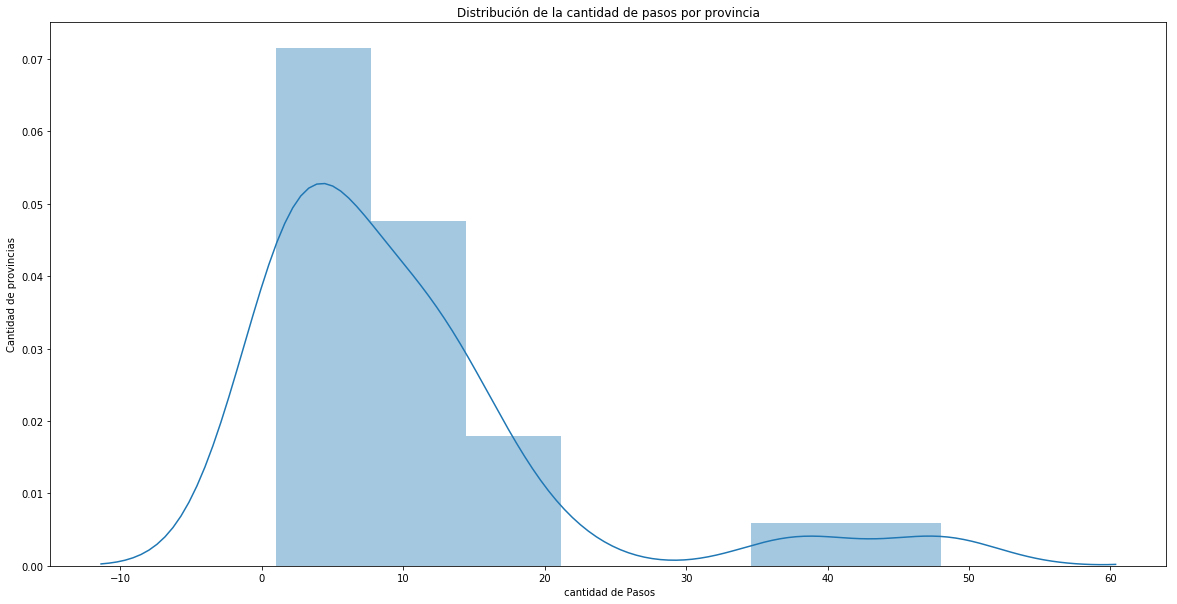

In [28]:
plt.figure(figsize=(20,10))
_ = sns.distplot(data.province.value_counts())
_ = plt.title('Distribución de la cantidad de pasos por provincia')
plt.xlabel(" cantidad de Pasos")
plt.ylabel("Cantidad de provincias")

EJERCICIO 3 PROYECTOS (LIMPIEZA)

In [41]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
kickstarter_2018 = pd.read_csv("E:/Documents/GitHub/análisis y curación de datos/AnalisisYCuracion-master/input/kickstarter-projects/ks-projects-201801.csv",index_col=['ID'] )

In [42]:
kickstarter_2018

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.00,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.00,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.00,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.00,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00


In [43]:
kickstarter_2018.shape

(378661, 14)

In [45]:
prj_duplicados_x_nombre = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)]
prj_duplicados_x_nombre.sort_values('name')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.00,2014-01-03 20:39:16,37.00,failed,3,US,37.00,37.00,6500.00
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.00,2011-08-28 21:27:52,3000.00,successful,24,US,3000.00,3000.00,3000.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00
1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.00,2015-06-27 02:02:00,100.00,failed,1,US,100.00,100.00,100000.00
422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.00,2017-04-14 00:08:52,1.00,failed,1,US,25.00,1.00,100000.00
866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.00,2015-01-27 19:30:43,7248.00,canceled,9,US,7248.00,7248.00,20000.00
1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.00,2014-07-29 13:12:21,11260.00,canceled,7,US,11260.00,11260.00,15000.00
1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.00,2016-05-07 01:56:36,0.00,canceled,0,"N,0""",nan,0.00,5000.00


En funcion de lo verificado se han replicado 5125 registros en total. Algnos duplicados, triplicados, otros cuadriculados, etc.

#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado.
1. Generamos el hash

In [46]:
from hashlib import md5

def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()


kickstarter_2018['hash_name'] = kickstarter_2018['name'].apply(hashit)

2. A continuacion se presenta la lista de names con sus respectivos hash

In [47]:
kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)].sort_values(by='name')[['name','hash_name','category','main_category','currency','deadline']]

,name,hash_name,category,main_category,currency,deadline
ID,,,,,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1,Fashion,Fashion,USD,2014-02-09
815783250,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1,Fashion,Fashion,USD,2014-03-01
1010584633,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e,Shorts,Film & Video,USD,2011-09-25
713417995,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e,Documentary,Film & Video,USD,2013-03-27
1880084695,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c,Shorts,Film & Video,USD,2015-08-26
422509694,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c,Television,Film & Video,USD,2017-05-14
866225086,"""City of Mercy"" (Canceled)",b4ca2044f21f67e13ddb7583f59189a7,Film & Video,Film & Video,USD,2015-02-26
1760892298,"""City of Mercy"" (Canceled)",b4ca2044f21f67e13ddb7583f59189a7,Television,Film & Video,USD,2014-08-28
1999958521,"""Color"" Music Video",bed6c6cbc0540c8d40b7e2311806cc5c,Film & Video,Film & Video,USD,2016-06-06


Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [69]:
import chardet
import string
import sys
in_colab = 'google.colab' in sys.modules



In [73]:
import sys.ftfy


ImportError: No module named 'sys.ftfy'; 'sys' is not a package


Ejercicio 4

Codificar currency con ambas estrategias


In [76]:
column='currency'
kickstarter_2018[column].unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

In [79]:
import sklearn
from sklearn import preprocessing

ImportError: No module named 'sklearn'

In [77]:



from sklearn.preprocessing import LabelBinarizer

# Label Encoder
le = preprocessing.LabelEncoder()
le.fit(kickstarter_2018[column])
print(le.classes_)



ImportError: No module named 'sklearn'